<a href="https://colab.research.google.com/github/ernesto-miguez/Machine-Learning-training/blob/master/ML_Debugging.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Debugging a Simple Model 

In [0]:
# Reset environment for a new run
% reset -f


# Load libraries
from os.path import join # for joining file pathnames
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

# Set Pandas display options
pd.options.display.max_rows = 10
pd.options.display.float_format = '{:.1f}'.format

In [0]:
features = np.array(range(10))
features = features[:, np.newaxis]
# Create labels by adding noise distributed around 0
labels = features + np.random.random(size=[10,1]) - 0.5

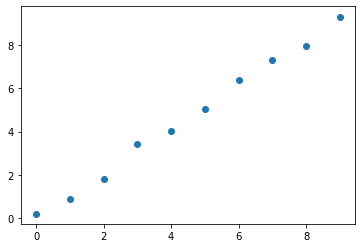

In [0]:
# Visualize the data
plt.scatter(features, labels)

## Fit Simple Data with Simple Model

In [0]:
# Delete any existing assignment to "model"
model = None

# Use a sequential model
model = keras.Sequential()

# Add a layer with 1 neuron. Use the popular "tanh" activation function
model.add(keras.layers.Dense(units = 1,
                             activation = 'linear',
                             input_dim=1))

# Model calculates loss using MSE
# Model trains using Adam optimizer with learning rate = 0.001
model.compile(optimizer=tf.train.AdamOptimizer(0.001),
              loss='mse',)

print(model.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________
None


Train on 10 samples
Epoch 1/10
10/10 [==============================] - 0s 10ms/sample - loss: 8.2336
Epoch 2/10
10/10 [==============================] - 0s 1ms/sample - loss: 7.9887
Epoch 3/10
10/10 [==============================] - 0s 1ms/sample - loss: 7.6886
Epoch 4/10
10/10 [==============================] - 0s 2ms/sample - loss: 7.4573
Epoch 5/10
10/10 [==============================] - 0s 1ms/sample - loss: 7.2307
Epoch 6/10
10/10 [==============================] - 0s 1ms/sample - loss: 6.9743
Epoch 7/10
10/10 [==============================] - 0s 2ms/sample - loss: 6.7764
Epoch 8/10
10/10 [==============================] - 0s 1ms/sample - loss: 6.5212
Epoch 9/10
10/10 [==============================] - 0s 1ms/sample - loss: 6.3266
Epoch 10/10
10/10 [==============================] - 0s 1ms/sample - loss: 6.1034


Text(0.5, 1.0, 'Loss Curves')

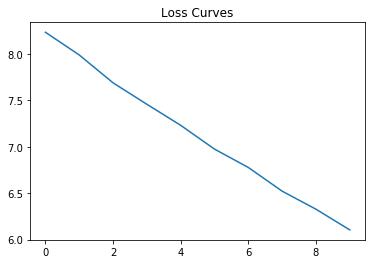

In [0]:
# Train the model
trainHistory = model.fit(x=features,
          y=labels,
          epochs = 10,
          batch_size = 1,
          verbose=1)

# Plot the loss curve
plt.plot(trainHistory.history['loss'])
plt.title("Loss Curves")

## Reaching convergence by increasing Learning Rate to 0.1


In [0]:
model = None
model = keras.Sequential()
model.add(keras.layers.Dense(1, activation='linear', input_dim=1))
model.compile(optimizer=tf.train.AdamOptimizer(0.1), loss='mse')
model.fit(features, labels, batch_size=1, epochs=5, verbose=1)

Train on 10 samples
Epoch 1/5
10/10 [==============================] - 0s 11ms/sample - loss: 109.4344
Epoch 2/5
10/10 [==============================] - 0s 1ms/sample - loss: 31.0880
Epoch 3/5
10/10 [==============================] - 0s 1ms/sample - loss: 8.5178
Epoch 4/5
10/10 [==============================] - 0s 1ms/sample - loss: 1.3399
Epoch 5/5
10/10 [==============================] - 0s 1ms/sample - loss: 2.0775


## Confirm the model works by predicting reults for values[0,9] and superimposing them on top of the features

10/10 [==============================] - 0s 5ms/sample


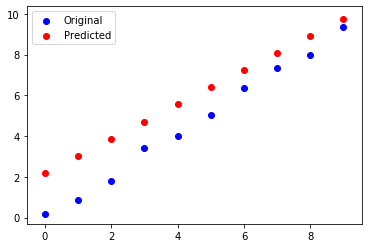

In [0]:
# Get predictions
featuresPred = model.predict(features, verbose=1)
# Plot original features (blue) and predicted values (red)
featuresPred = np.transpose(featuresPred)
plt.scatter(range(10), labels, c="blue")
plt.scatter(range(10), featuresPred, c="red")
plt.legend(["Original", "Predicted"])

## Exploding Gradients

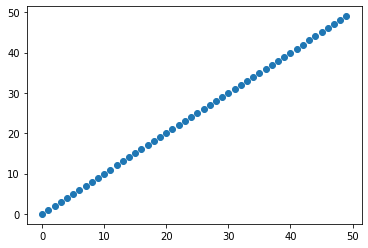

In [0]:
# Create data with large values
features = np.array(range(50))
# Generate labels
labels = features + np.random.random(features.shape) - 0.5

# Transpose data for input
[feature, labels] = [features.transpose(), labels.transpose()]

plt.scatter(range(len(features)), features)

## Train a model with learning rate of 0.01

In [0]:
model = None
model = keras.Sequential()
model.add(keras.layers.Dense(1, input_dim=1, activation='linear'))
model.compile(optimizer=keras.optimizers.SGD(0.001), loss = 'mse')
model.fit(feature, labels, batch_size=10, epochs=5, verbose=1)

Train on 50 samples
Epoch 1/5
50/50 [==============================] - 0s 2ms/sample - loss: 1.9783
Epoch 2/5
50/50 [==============================] - 0s 188us/sample - loss: 0.2743
Epoch 3/5
50/50 [==============================] - 0s 174us/sample - loss: 0.2232
Epoch 4/5
50/50 [==============================] - 0s 186us/sample - loss: 0.2250
Epoch 5/5
50/50 [==============================] - 0s 206us/sample - loss: 0.1680
